In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
data= pd.read_csv('merged_titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

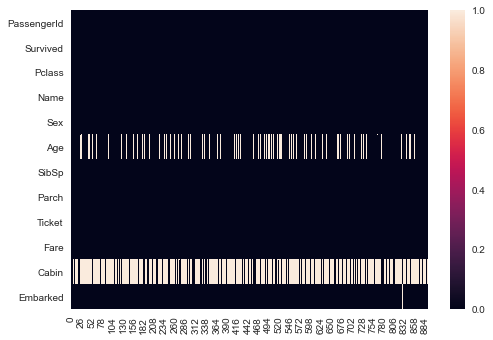

In [4]:
# Note to avoid future confusion, the heatmap shows the null values, the bright spots signify that .isnull returns True there.
# the dark area represents areas where data exists. All the transpose does is swaps the axes to make it easier to read where the majority of the 
# null values lie. It is also quite easy to tell where most of the null values lie given the .info output in the cell prior.
# I think that the best bet to clean this data is to drop the Cabin column since there are too many null values to perform imputation. I will
# Try some imputation methods for age however since only around 170 are missing, it shouldn't be hard to 'estimate' their age given the other data on other # passengers that share similar qualities with the age-less passengers
sns.heatmap(data.isnull().transpose())

In [5]:
data= data.drop(columns=['Cabin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
# Note to self, if you decide to add dummy variables to some of the categorical data here, make sure you make k-1 dummy variables (1 less than the number of categorical outputs), so as not to fall for the dummy variable trap which would cause perfect multicollinearity in at least two of the dummy variables.
# Since KNN seems viable here as a means as imputating the missing ages, here is a link to a valuable article:
# 'https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e'

In [7]:
dummy_vars = data[['Sex', 'Embarked']]
dummies = pd.get_dummies(dummy_vars, drop_first=True)
dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [8]:
data = data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1)
data = pd.concat([data, dummies], axis= 1)

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [11]:
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns= data.columns)

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [12]:
data = pd.DataFrame(scaler.inverse_transform(data), columns = data.columns)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


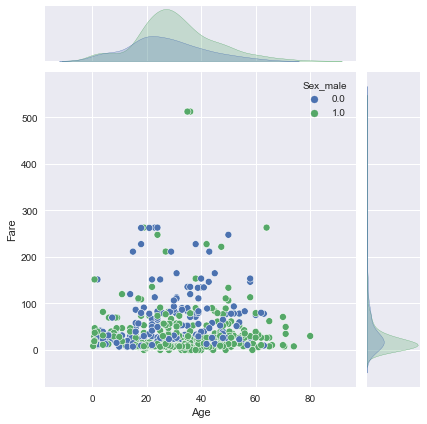

In [15]:
sns.jointplot(data= data, x='Age', y= 'Fare', hue='Sex_male', kind='scatter')